<a href="https://colab.research.google.com/github/motokimura/attention_branch_network_demo/blob/master/attention_branch_network_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention Branch Network Demo

This notebook demonstrates [Attention Branch Network](https://github.com/machine-perception-robotics-group/attention_branch_network/blob/master/README_en.md) proposed and implemented by [Hiroshi Fukui](https://github.com/Hiroshi-Fukui).

This notebook is assumed to be used on [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb). 
By launching this notebook on Google Colab., you can see the output from the Attention Branch Network.


## 0. Environment setup

### Install PyTorch via pip.

In [1]:
!pip install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip install torchvision

# Because PIL > 4.0.0 does not work on Colaboratory for some reason, replace it with 4.0.0
!pip install Pillow==4.0.0

    100% |████████████████████████████████| 483.0MB 47.8MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x56646000 @  0x7f78fdd582a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 1.2MB/s 
    100% |████████████████████████████████| 2.0MB 13.3MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.6MB 7.6MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


### Clone Attention Branch Network codes from GitHub.

In [2]:
!git clone https://github.com/machine-perception-robotics-group/attention_branch_network.git

Cloning into 'attention_branch_network'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 178 (delta 6), reused 13 (delta 3), pack-reused 162
Receiving objects: 100% (178/178), 2.43 MiB | 2.66 MiB/s, done.
Resolving deltas: 100% (71/71), done.


## 1. Prepare test-data for the demo

### Download a test-image and show

--2018-11-18 15:44:37--  https://www.lifewithcats.tv/wp-content/uploads/2015/01/gfhdgfgfgdfgdf.jpg
Resolving www.lifewithcats.tv (www.lifewithcats.tv)... 104.28.26.242, 104.28.27.242, 2606:4700:30::681c:1bf2, ...
Connecting to www.lifewithcats.tv (www.lifewithcats.tv)|104.28.26.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 189624 (185K) [image/jpeg]
Saving to: ‘gfhdgfgfgdfgdf.jpg’

gfhdgfgfgdfgdf.jpg  100%[===================>] 185.18K  --.-KB/s    in 0.009s  

2018-11-18 15:44:39 (20.1 MB/s) - ‘gfhdgfgfgdfgdf.jpg’ saved [189624/189624]



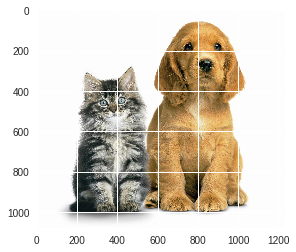

In [3]:
!wget https://www.lifewithcats.tv/wp-content/uploads/2015/01/gfhdgfgfgdfgdf.jpg

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = Image.open('gfhdgfgfgdfgdf.jpg')
image = np.array(image)
plt.imshow(image)

## 2. Load Attention Branch Network

### Download pre-trained attention branch network (ResNet101-base) weights listed [here](https://github.com/machine-perception-robotics-group/attention_branch_network/blob/master/README_en.md#models-on-imagenet2012-dataset).

In [4]:
!wget https://www.dropbox.com/sh/8vzv7ov59xb5wle/AADUtmzotCQKJ6WLPwdDEQqwa/model_best.pth.tar

--2018-11-18 15:44:42--  https://www.dropbox.com/sh/8vzv7ov59xb5wle/AADUtmzotCQKJ6WLPwdDEQqwa/model_best.pth.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/8vzv7ov59xb5wle/AADUtmzotCQKJ6WLPwdDEQqwa/model_best.pth.tar [following]
--2018-11-18 15:44:42--  https://www.dropbox.com/sh/raw/8vzv7ov59xb5wle/AADUtmzotCQKJ6WLPwdDEQqwa/model_best.pth.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc73e8a4d8a6b009e37090d67e38.dl.dropboxusercontent.com/cd/0/inline/AV2bCj_H_dwr6sZiHr72U-XkwTN6s6MXNy3QstQqHZ6M2q8Nen47BWAflCCEmMXCVLpM5pLj3PcH4JbqOqLyJML_y2el7Cz8Seo1xbKfE1T_FlFsQhPPglPOXAq08Gf0RzZDDMGvTSi8Z_DRCkCgypXxVryyuAn2V9kIwlY-VJgUA5DUCCkGU7qmIXU_49kkrJs/file [following]
--2018-11-18 15:44:43--  https://uc73e8a4d8a6b009

### Load weights from pre-trained model

In [0]:
import torch

import sys
sys.path.append("attention_branch_network")
from models.imagenet.resnet import resnet101

model = resnet101()
model = torch.nn.DataParallel(model).cuda()

model_path = "model_best.pth.tar"
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['state_dict'])

model.eval();

## 3. Input test-image to the network

### Preprocess the image to input


In [0]:
import cv2

image_resized = cv2.resize(image, (224, 224))

mean = np.array([[[0.485, 0.456, 0.406]]])
std = np.array([[[0.229, 0.224, 0.225]]])
input = image_resized / 255.0
input = (input - mean) / std

input = np.transpose(input, (2, 0, 1))
input = input[None, :, :, :]
input = torch.Tensor(input)

input = torch.autograd.Variable(input)
input = input.cuda()

### Input to the network!

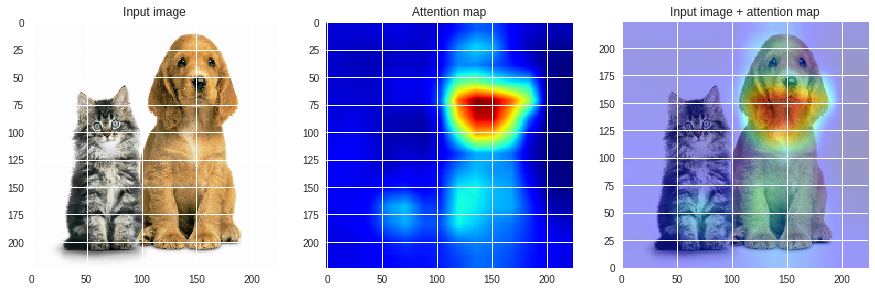

In [7]:
# Input test-data into the network
with torch.no_grad():
  ax, rx, atts = model(input)

att, _, _ = atts
att = att.cpu().detach().numpy()[0][0]

#att = cv2.resize(att, (64, 64), interpolation=cv2.INTER_LINEAR)
#att = cv2.resize(att, (224, 224), interpolation=cv2.INTER_NEAREST)
att = cv2.resize(att, (224, 224), interpolation=cv2.INTER_LINEAR)


# Plot results
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(3 * 5, 5))
  
## Input image
ax0.imshow(image_resized)
ax0.set_title("Input image")

## Attention map
ax1.imshow(att, cmap='jet', vmin=att.min(), vmax=att.max())
ax1.set_title("Attention map")

## Input image + attention map
extent = 0, 224, 0, 224
ax2.imshow(image_resized, extent=extent)
ax2.imshow(att, cmap='jet', alpha=0.4, extent=extent, vmin=att.min(), vmax=att.max())
ax2.set_title("Input image + attention map")

plt.show()

In [8]:
rx_array = rx.cpu().detach().numpy()[0]
rx_pred = np.argmax(rx_array)
print("Prediction from classification branch : ", rx_pred)

ax_array = ax.cpu().detach().numpy()[0]
ax_pred = np.argmax(ax_array)
print("Prediction from attention branch : ", ax_pred)

Prediction from classification branch :  219
Prediction from attention branch :  219


According to [this text file](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), class 219 corresponds 'cocker spaniel, English cocker spaniel, cocker'. 

Prediction is correct and is consistent with the attention map!!